# Example usage

To use `renewenergy` in a project:

In [1]:
import renewenergy

print(renewenergy.__version__)

0.1.1


## Imports

In [5]:
from renewenergy.clean_data import clean_data
from renewenergy.create_scatter_plots import create_scatter_plots
from renewenergy.reading_data import reading_data
from renewenergy.impute_split import impute_split
from renewenergy.split_xy_columns import split_xy_columns
from renewenergy.plot_rmse import plot_rmse

import pandas as pd
from matplotlib import pyplot as plt


## Create Datasets

The code below creates a dummy dataset that can be used to demonstrate use of functions within this package.

In [6]:
test_data= {'Variable 1':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 
            'Variable 1':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
            'Variable 1':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
            'Variable 1':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
            "Renewable electricity output (% of total electricity output)":['A1', 'B1', 'C1', 'D1','E1','F1', 'G1', 'H1', 'I1','J1']}

test_df= pd.DataFrame(test_data)
test_df.head()

,Variable 1,Renewable electricity output (% of total electricity output)
0,A,A1
1,B,B1
2,C,C1
3,D,D1
4,E,E1


## Function Usage

## reading_datain

Below is a URL containing a zip file with a CSV file containing target data. The function *reading_datain* will read in the target data and save it to a CSV named downloaded.csv in the data directory.

In [9]:
url= "https://github.com/DSCI-310-2024/renewenergy/raw/makingdocumentation/tests/docs_data.zip"

imported_data= reading_data(url, "testing_data.csv", "data", "imported.csv")

## clean_data

The function, *clean_data* will take tidy the data loaded below into tidy format. Within this function, the data will be split with a certain seed (accomplished by *impute_split*, which the use is demonstrated below.

In [10]:
cleaned_data= clean_data("data/imported.csv", "data", "energy_test.csv", "energy_train.csv",12)

split_data_train,split_data_train_test = impute_split(test_df, 0, 0.5)
print(split_data_train)


  Variable 1 Renewable electricity output (% of total electricity output)
6          G                                                 G1          
7          H                                                 H1          
3          D                                                 D1          
0          A                                                 A1          
5          F                                                 F1          


In [11]:
print(split_data_train_test)

  Variable 1 Renewable electricity output (% of total electricity output)
2          C                                                 C1          
8          I                                                 I1          
4          E                                                 E1          
9          J                                                 J1          
1          B                                                 B1          


## create_scatter_plots

This function will aid in EDA, after identifying the columns to be plotted against the target variable, clean plots will be generated to further understand the relationship between variables.

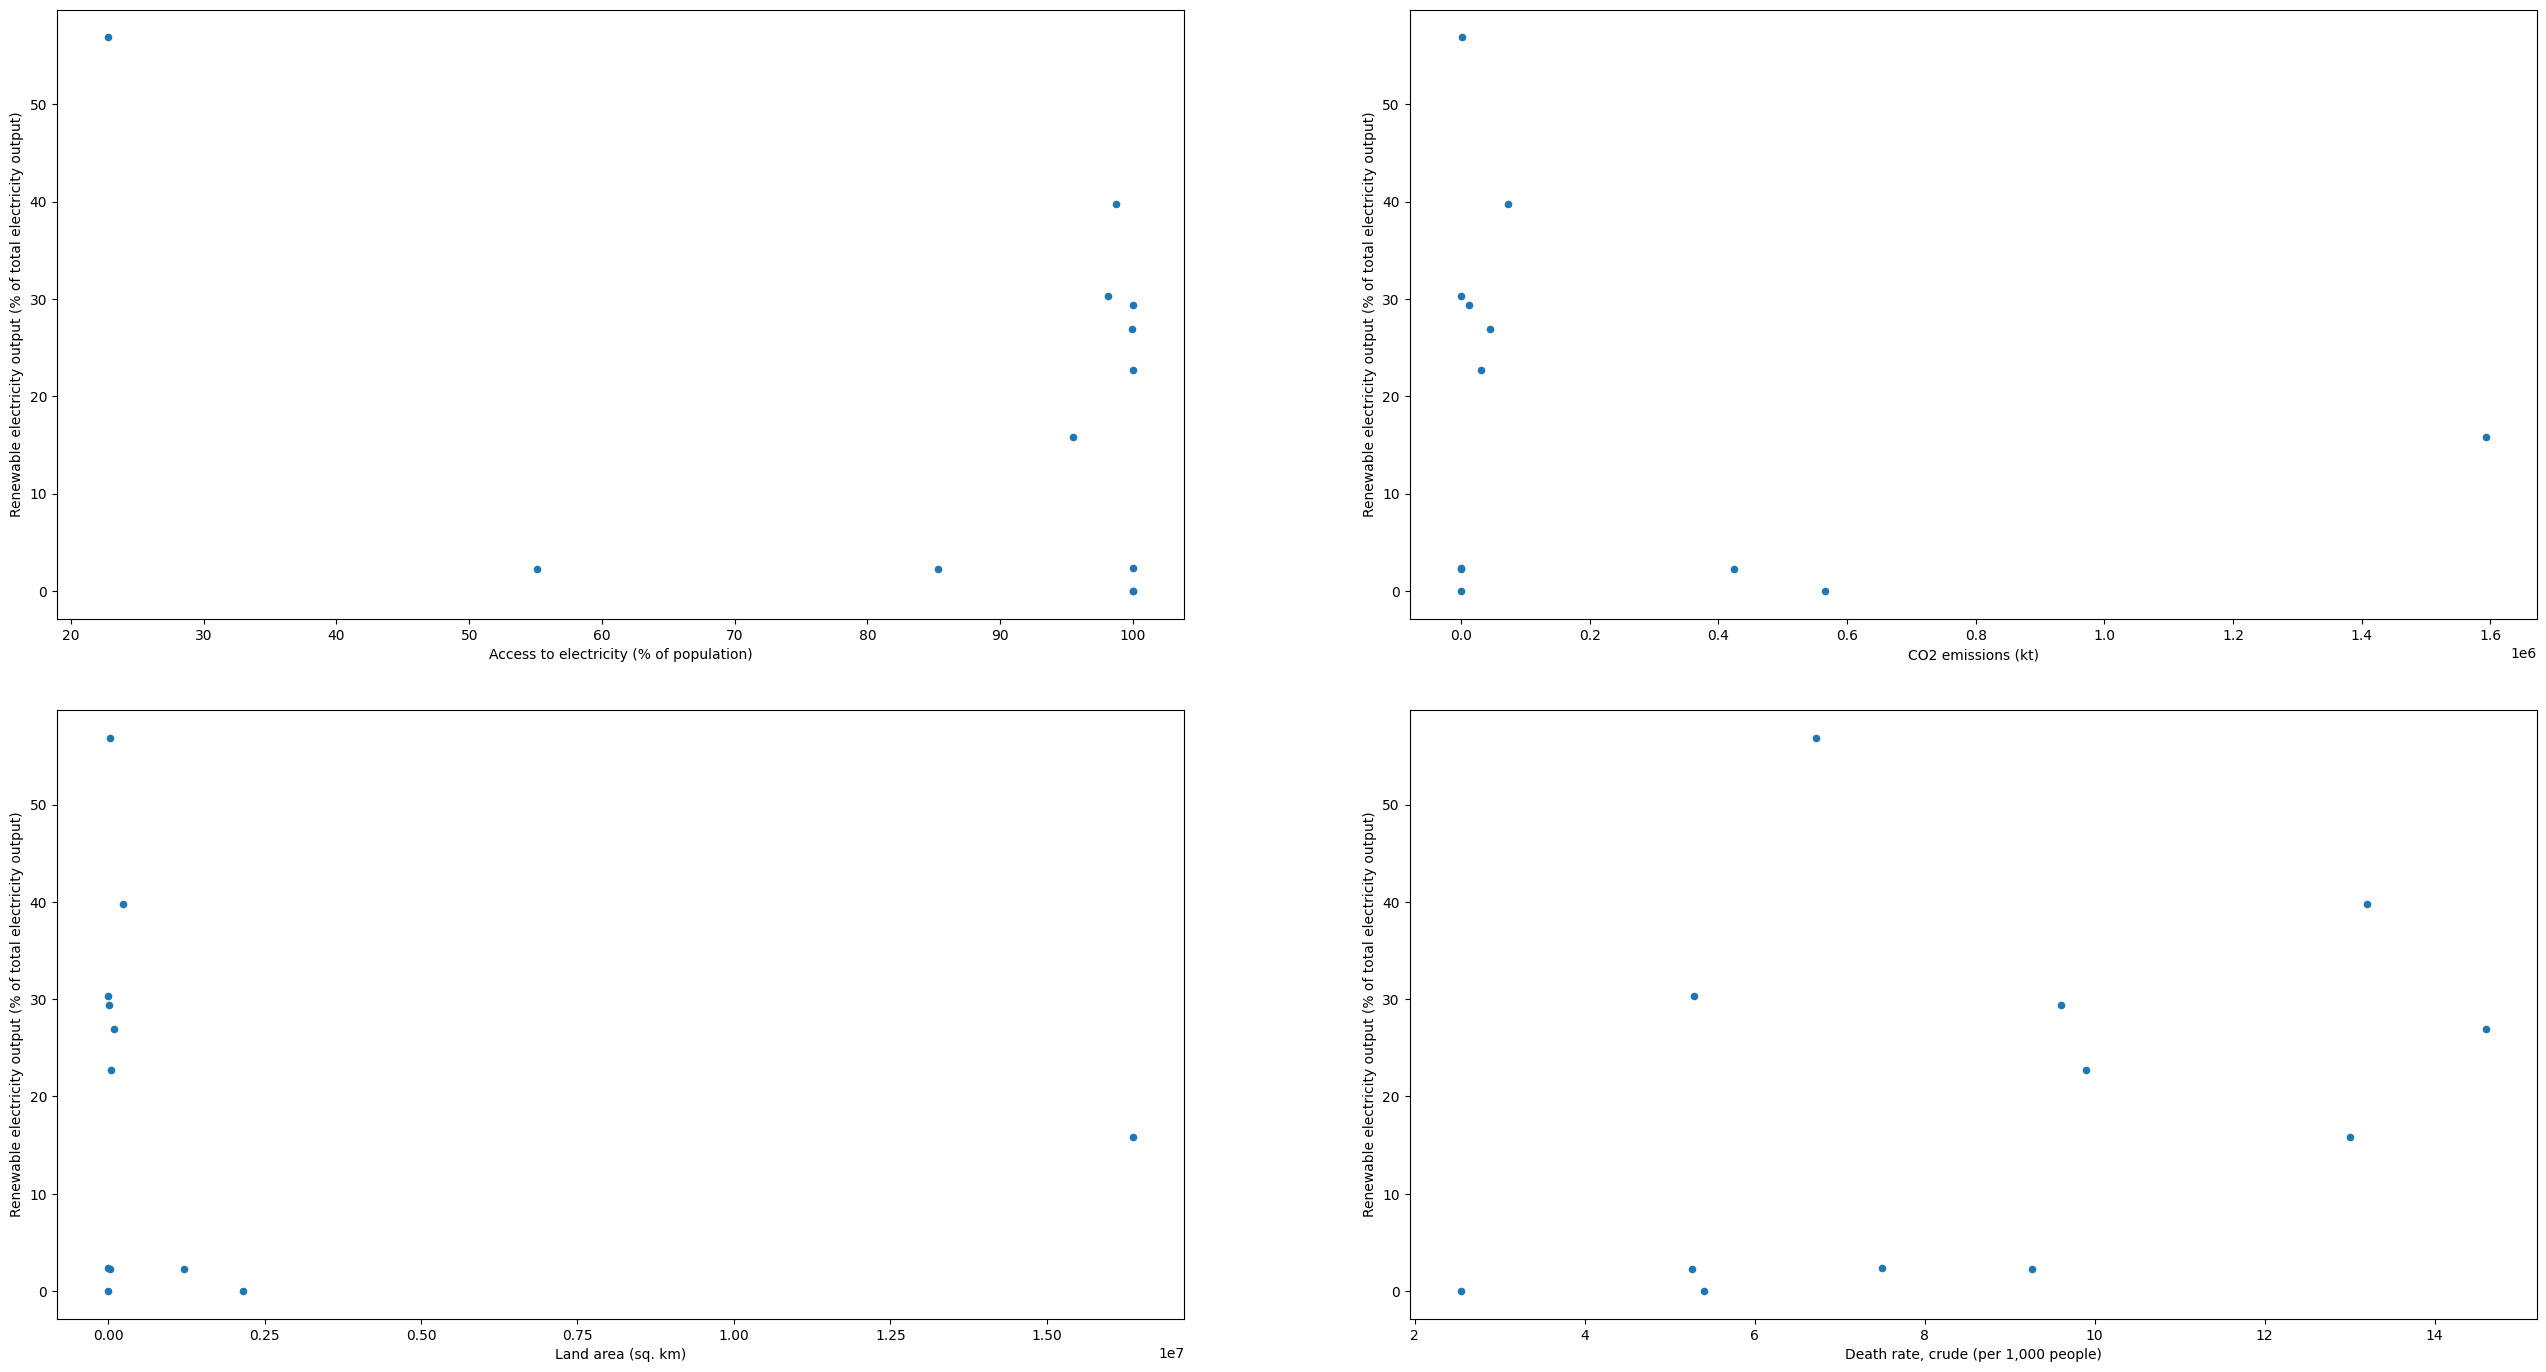

In [12]:
from matplotlib import pyplot as plt

data = pd.read_csv("data/energy_train.csv")

toprow = ['Access to electricity (% of population)', 'CO2 emissions (kt)']
bottomrow = ['Land area (sq. km)', 'Death rate, crude (per 1,000 people)']
    
    #combine all columns for x-axis in a single list
x_columns = toprow + bottomrow
    
    #specify the common y-axis column for all plots
y_column = 'Renewable electricity output (% of total electricity output)'
    
    #scatter plots
fig = create_scatter_plots(data, x_columns, y_column, nrows=2, ncols=2)

## split_xy_columns

This function will create the datasets with and without the target variable, which makes it easy to compare predicted vs actual values.

In [15]:
split_data_x,split_data_y = split_xy_columns(data)
split_data_x

,Access to electricity (% of population),Adjusted net national income (constant 2015 US$),CO2 emissions (kt),"Death rate, crude (per 1,000 people)",Land area (sq. km),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Renewable energy consumption (% of total final energy consumption)
0,100.000000,1.155276e+09,499.80,7.500,460.0,15.313468,93419.0,1.36
1,100.000000,5.297312e+11,565190.10,2.542,2149690.0,66.820874,32749848.0,0.01
2,100.000000,3.281082e+10,13139.70,9.600,20142.6,17.920895,2063531.0,21.38
3,55.100000,1.178042e+09,304.10,5.260,27990.0,12.490086,612660.0,48.64
4,98.761360,1.428836e+11,73314.40,13.200,230080.0,16.094924,19815616.0,23.67
5,100.000000,0.000000e+00,0.00,5.400,34.0,0.000000,38825.0,0.05
6,98.155426,7.326220e+08,232.30,5.281,2830.0,11.016346,203571.0,37.47
7,22.800000,6.950738e+09,1080.44,6.724,24670.0,38.642417,11642959.0,86.31
8,95.500000,1.083893e+12,1592559.40,13.000,16376870.0,12.874773,144096870.0,3.20
9,99.900000,3.252919e+10,45410.10,14.600,87460.0,27.892525,7095383.0,21.24


## plot_rmse

This function will calculate the RMSE values and plot the expected vs predicted values for each value in the testing set, based on the model created with the training data.

In [16]:
results= plot_rmse("data/energy_train.csv", "data/energy_test.csv", "results/lin_reg_results.png")

NameError: name 'split_xy_columns' is not defined